First few rows of Unemployment in India.csv:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural



First few rows of Unemployment_Rate_upto_11_2020.csv:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74



Information for Unemployment in India.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None

Information for Unemployment_Rate_upto_11_2020.csv:
<class 'pandas.core.frame.Dat

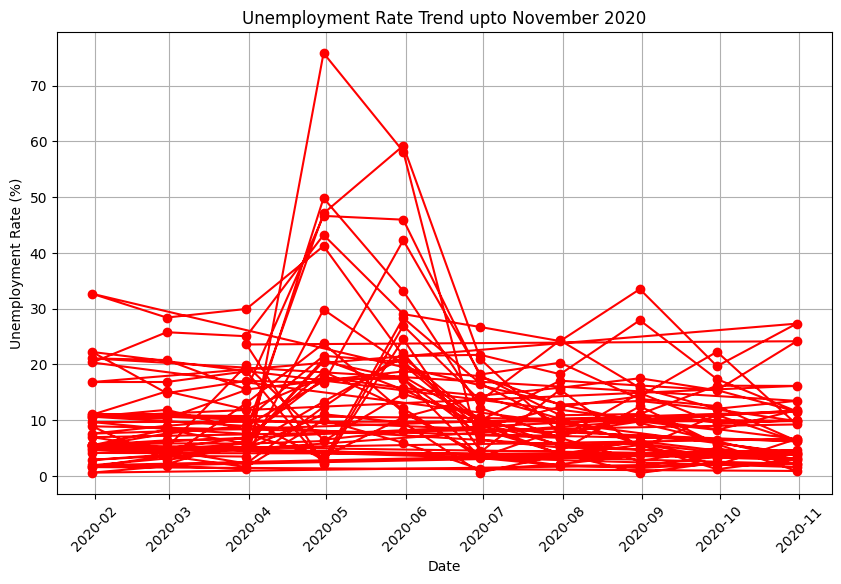

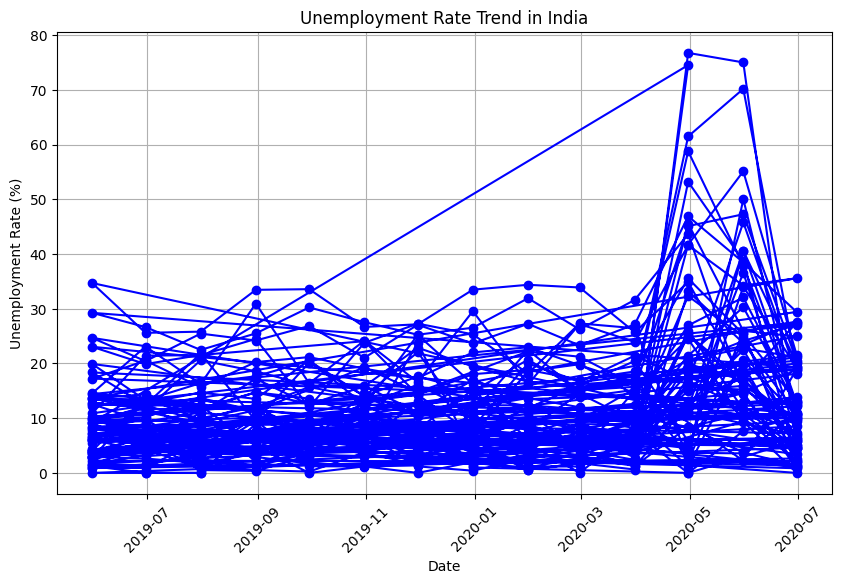

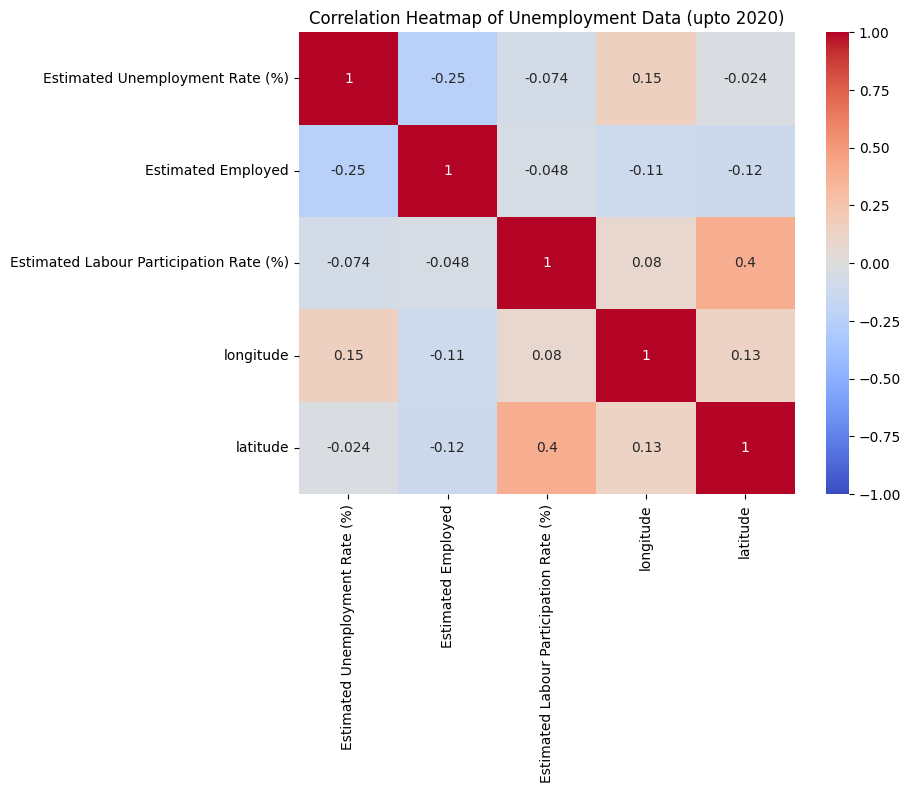

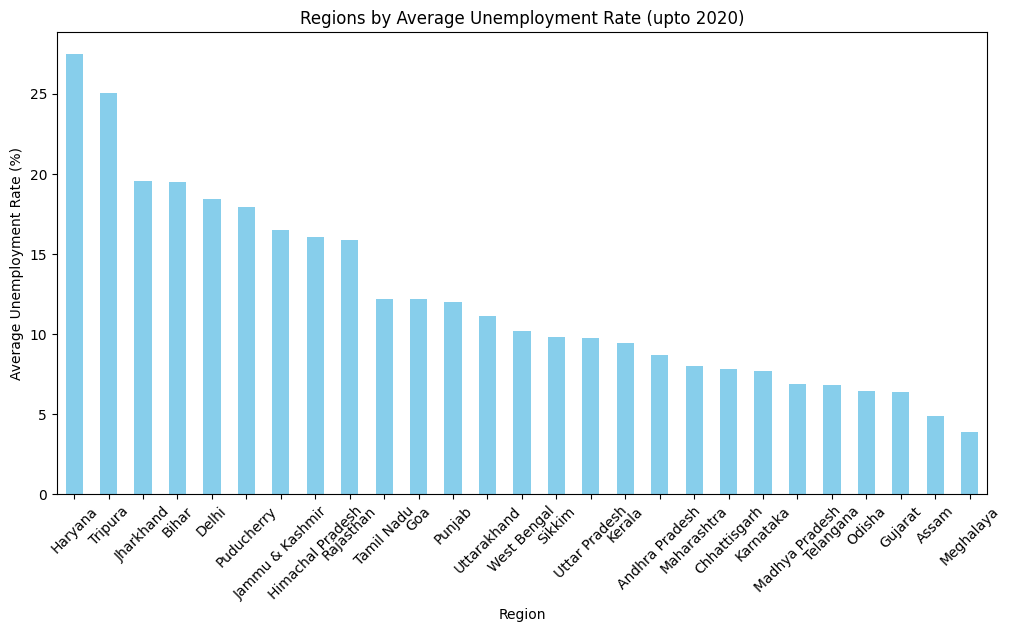

/nStatistical Analysis for Unemployment in India: 
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64
/nStatistical Analysis for Unemployment Rate upto 2020: 
count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name: Estimated Unemployment Rate (%), dtype: float64


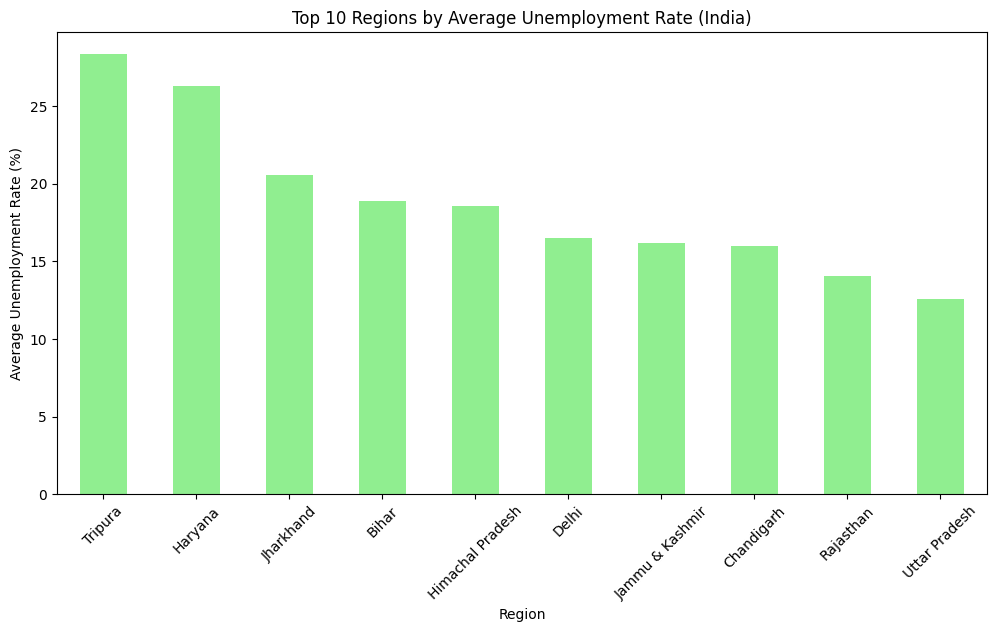

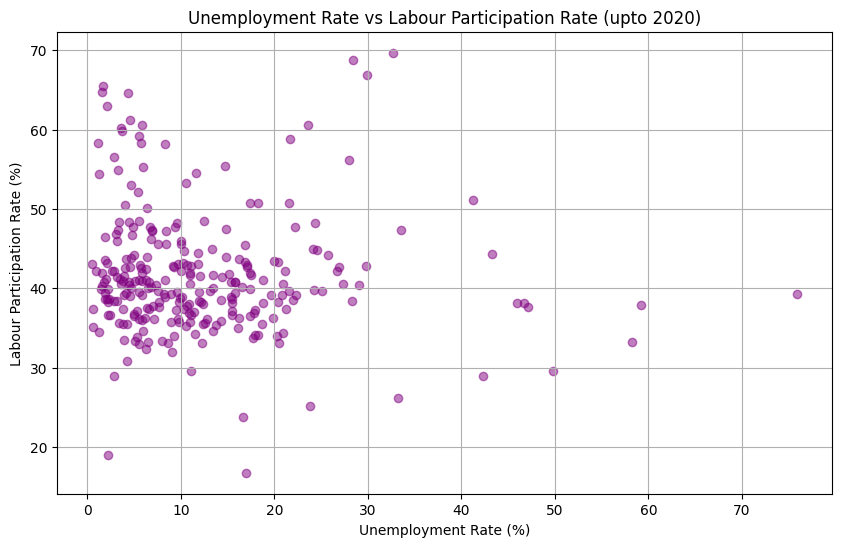

/nStatistical analysis saved to figures/statistical_ananlysis.csv


In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = 'Data/Unemployment in India.csv'
df_india = pd.read_csv(data_path)
df_upto_2020 = pd.read_csv('Data/Unemployment_Rate_upto_11_2020.csv')
df_upto_2020.columns = df_upto_2020.columns.str.strip()
df_india.columns = df_india.columns.str.strip()

# Convert Date columns to datetime
df_india['Date'] = pd.to_datetime(df_india['Date'], dayfirst=True)
df_upto_2020['Date'] = pd.to_datetime(df_upto_2020['Date'], dayfirst=True)

# Display first few rows of each dataset
print('First few rows of Unemployment in India.csv:')
display(df_india.head())

print('\nFirst few rows of Unemployment_Rate_upto_11_2020.csv:')
display(df_upto_2020.head())

# Basic information
print('\nInformation for Unemployment in India.csv:')
print(df_india.info())

print('\nInformation for Unemployment_Rate_upto_11_2020.csv:')
print(df_upto_2020.info())

# Check for missing values
print('\nMissing values in Unemployment in India.csv:')
print(df_india.isnull().sum())

print('\nMissing values in Unemployment_Rate_upto_11_2020.csv:')
print(df_upto_2020.isnull().sum())

# Handle missing values in df_india (drop rows with missing data)
df_india = df_india.dropna()

# Line chart for Unemployment Rate upto 2020
plt.figure(figsize=(10, 6))
plt.plot(df_upto_2020['Date'], df_upto_2020['Estimated Unemployment Rate (%)'], marker='o', color='r')
plt.title('Unemployment Rate Trend upto November 2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.xticks(rotation=45)
plt.savefig('figures/line_chart_2020.png')
plt.show()

# Line chart for Unemployment Rate in India
plt.figure(figsize= (10, 6))
plt.plot(df_india['Date'], df_india['Estimated Unemployment Rate (%)'], marker='o', color='b')
plt.title('Unemployment Rate Trend in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.xticks(rotation=45)
plt.savefig('figures/line_chart_india.png')
plt.show()

# Heatmap of correlations for df_upto_2020
plt.figure(figsize=(8, 6))
numeric_cols = df_upto_2020.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Unemployment Data (upto 2020)')
plt.savefig('figures/heatmap.png')
plt.show()

# Bar chart for average unemployment rate by region
avg_unemployment = df_upto_2020.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False) 
plt.figure(figsize=(12, 6))
avg_unemployment.plot(kind='bar', color='skyblue')
plt.title('Regions by Average Unemployment Rate (upto 2020)')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.savefig('figures/bar_chart_regions.png')
plt.show()

# Statistical analysis
print('/nStatistical Analysis for Unemployment in India: ')
print(df_india['Estimated Unemployment Rate (%)'].describe())

print('/nStatistical Analysis for Unemployment Rate upto 2020: ')
print(df_upto_2020['Estimated Unemployment Rate (%)'].describe())

# Bar chart for average unemployment rate by region in df_india
avg_unemployment_india = df_india.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)  # 10 منطقه برتر
plt.figure(figsize=(12, 6))
avg_unemployment_india.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Regions by Average Unemployment Rate (India)')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.savefig('figures/bar_chart_regions_india.png')
plt.show()

# Scatter plot for Unemployment Rate vs Labour Participation Rate
plt.figure(figsize=(10, 6))
plt.scatter(df_upto_2020['Estimated Unemployment Rate (%)'], df_upto_2020['Estimated Labour Participation Rate (%)'], color='purple', alpha=0.5)
plt.title('Unemployment Rate vs Labour Participation Rate (upto 2020)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Labour Participation Rate (%)')
plt.grid()
plt.savefig('figures/scatter_plot.png')
plt.show()

# Save statistical analysis to CSV
stats_india = df_india['Estimated Unemployment Rate (%)'].describe().to_frame().T
stats_upto_2020 = df_upto_2020['Estimated Unemployment Rate (%)'].describe().to_frame().T

stats_df = pd.concat([stats_india, stats_upto_2020], keys=['India', 'Upto_2020'])
stats_df.to_csv('figures/statistical_analysis.csv')
print('/nStatistical analysis saved to figures/statistical_ananlysis.csv')